# Day_046

### 練習時間
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
# load digits dataset
digits = datasets.load_digits()

df_digits = pd.DataFrame(digits.data)
print(df_digits.shape)
df_digits.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
print(pd.Series(digits.target).value_counts())
print("")
print(f"Unique values in digits.target = {np.unique(digits.target)}")

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

Unique values in digits.target = [0 1 2 3 4 5 6 7 8 9]


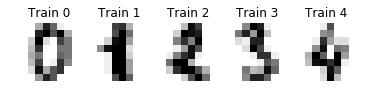

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8))
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Train %i' % label)

In [5]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 4)

# 建立模型
GBC = GradientBoostingClassifier()

# 訓練模型
GBC.fit(x_train, y_train)

# 預測測試集
y_pred = GBC.predict(x_test)

In [6]:
print(f'Accuracy = {accuracy_score(y_test, y_pred):.3f}') # 查看準確率
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred)) # 預測值與實際值的差距，使用 MSE

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Accuracy = 0.964
Mean squared error: 0.50
Variance score: 0.94


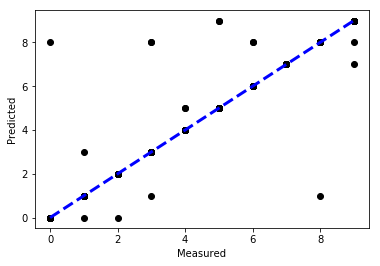

In [7]:
# 畫出訓練模型與實際資料的分佈
plt.scatter(y_test, y_pred,  color = 'black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color = 'blue', linewidth = 3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

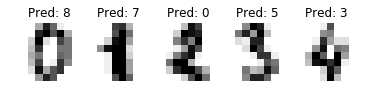

In [8]:
images_and_predictions = list(zip(digits.images, y_pred))
for index, (image, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8))
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Pred: %i' % prediction)

plt.show()